In [149]:
# Import the necessary packages
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import fftpack

In [150]:
def sir_model(q, t, beta, gamma, mu, nu):
    """Return the SIR model equations.""" 
    
    S, I, R = q
    
    dSdt = mu - beta*S*I - mu*S
    dIdt = beta*S*I - gamma*I - mu*I - nu*I
    dRdt = gamma*I - mu*R
    
    dqdt = [dSdt, dIdt, dRdt]
    
    return dqdt

# PROBLEM 1.1

In [151]:
def solve_sir_model(q0, t, parameters):
    """Solve the SIR model with numerical integration."""

    sol = odeint(sir_model, q0, t, parameters)
    S, I, R = sol[:, 0], sol[:, 1], sol[:, 2]

    return S, I, R

In [152]:
def plot_sir_model(S, I, R, t, title):
    """Plot the SIR model."""

    plt.figure()
    plt.plot(t, S, 'b', label='Susceptible')
    plt.plot(t, I, 'r', label='Infectious')
    plt.plot(t, R, 'g', label='Recovered')
    plt.xlabel('Time')
    plt.ylabel('Fraction of population')
    plt.legend()
    plt.title(title)
    plt.grid(True)
    plt.show()

In [153]:
def phase_space_sir_model(t, parameters, title):
    """Plot phase space diagram of model."""

    initial_conditions = []
    for i in np.linspace(0.0,1.0,11):
        S0 = i
        I0 = 1.0 - i
        R0 = 0.0
        initial_conditions.append((S0, I0, R0))
    for j in np.linspace(0.0,1.0,11):
        S0 = j
        I0 = 0.01
        R0 = 1-j-0.01
        initial_conditions.append((S0, I0, R0))
        
    for condition in initial_conditions:
        S0, I0, R0 = condition
        q0 = [S0, I0, R0]
        S,I,R = solve_sir_model(q0, t, parameters)
        plt.scatter(S0, I0, marker='o')
        plt.plot(S, I)

    plt.title(title)
    plt.xlabel('Fraction of Susceptible')
    plt.ylabel('Fraction of Infected')
    plt.grid()
    plt.show()

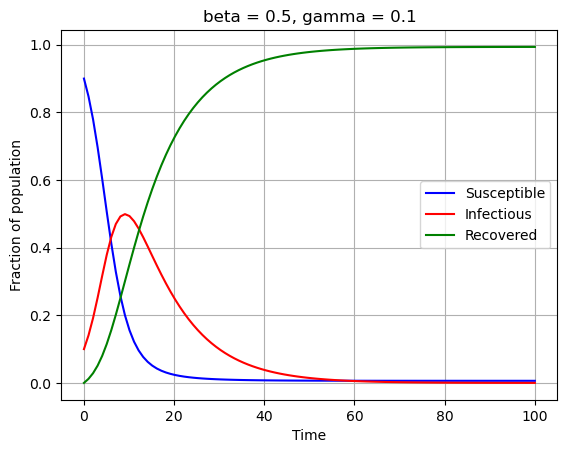

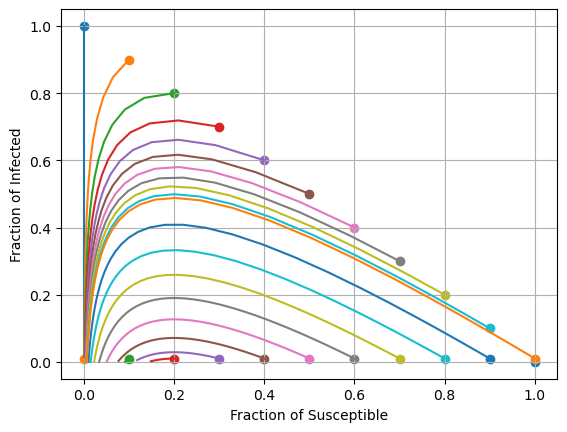

In [161]:
# Define the initial conditions, parameters and time interval
q0 = (0.9, 0.1, 0.0) # S(0) = 0.9, I(0) = 0.1, R(0) = 0.0
parameters = (0.5, 0.1, 0.0, 0.0) # beta = 0.5, gamma = 0.1
t = np.linspace(0, 100, 100) # 100 time units (days)

# Solve the SIR model
S, I, R = solve_sir_model(q0, t, parameters)

plot_sir_model(S, I, R, t, "beta = 0.5, gamma = 0.1")

phase_space_sir_model(t, parameters, '')

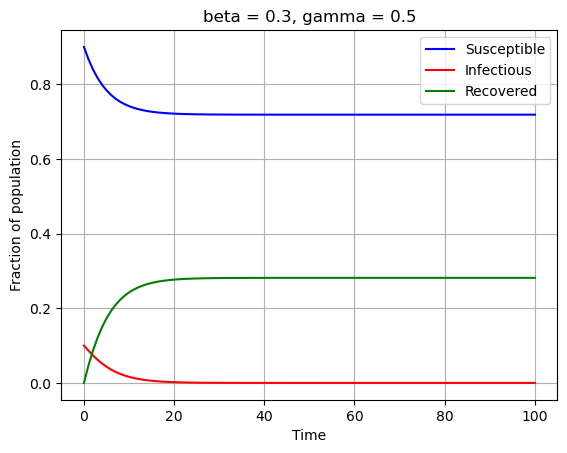

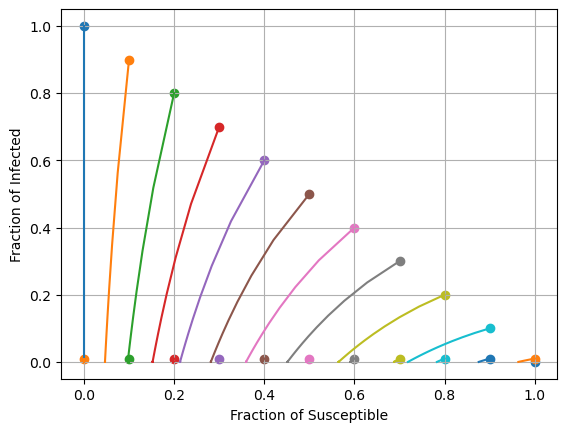

In [162]:
# (Re)define the initial conditions, parameters and time interval
q0 = (0.9, 0.1, 0.0)
parameters = (0.4, 0.5, 0.0, 0.0) # beta = 0.3, gamma = 0.5
t = np.linspace(0, 100, 100)

# Solve the SIR model
S, I, R = solve_sir_model(q0, t, parameters)

plot_sir_model(S, I, R, t, "beta = 0.3, gamma = 0.5")

phase_space_sir_model(t, parameters, '')

# PROBLEM 1.2

In [176]:
# Data from boys school
N = 763
X0 = 762
Y0 = 1
Z0 = 0

day = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
number = [1, 3, 8, 28, 75, 221, 291, 255, 235, 190, 125, 70, 28, 12, 5]

ratio = np.array(number)/N

In [179]:
def infections_school(t, beta, gamma):

    sol = odeint(sir_model, (X0/N, Y0/N, Z0/N), t, (beta, gamma, 0, 0))

    return sol[:,1]

In [180]:
# Fit the data on the school model and estimate the parameters
popt, pcov = curve_fit(infections_school, day, ratio)

popt

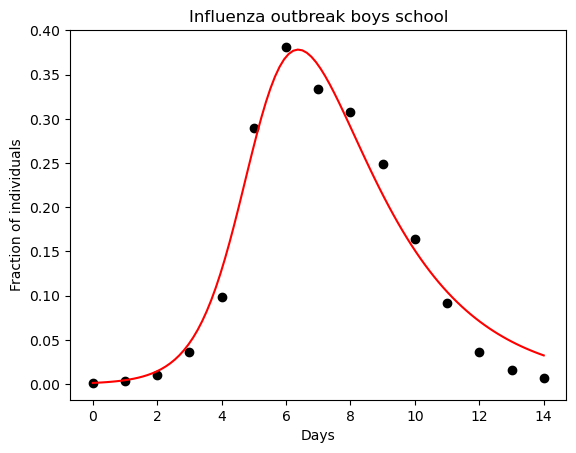

In [182]:
# Plot data and fitted SIR model in one figure
t = np.linspace(0, 14, 100)

plt.figure()
plt.title("Influenza outbreak boys school")
plt.plot(day, ratio, 'o', color='black')
plt.plot(t, infections_school(t, *popt), 'r')
plt.xlabel('Days')
plt.ylabel('Fraction of individuals')

plt.show()

# PROBLEM 1.3

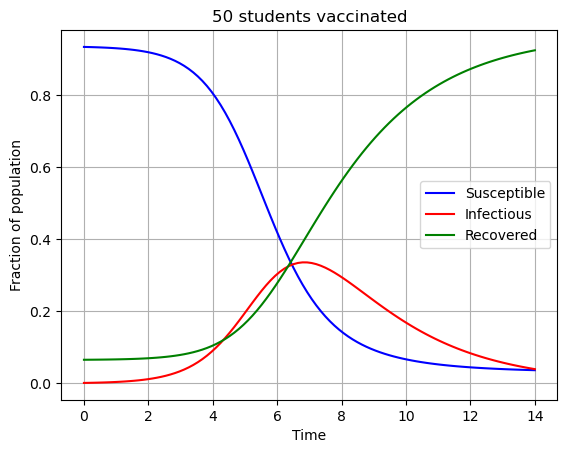

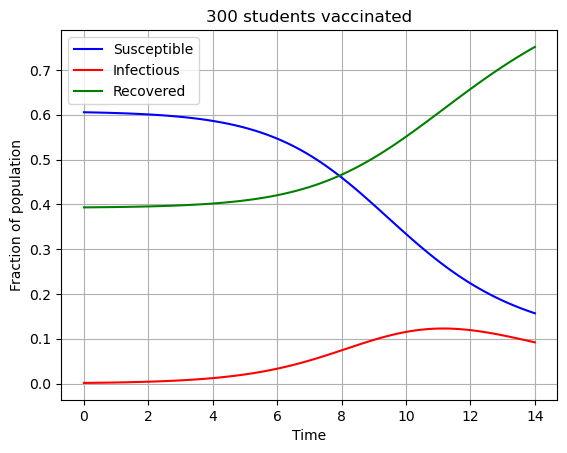

In [186]:
# (Re)define the initial conditions, parameters and time interval
q0 = (712/N, 1/N, 50/N) # X(0) = 712, Y(0) = 1, Z(0) = 50
parameters = (1.66, 0.44, 0.0, 0.0) # estimated parameters

# Solve the SIR model
S, I, R = solve_sir_model(q0, t, parameters)

plot_sir_model(S, I, R, t, "50 students vaccinated")

# (Re)define the initial conditions, parameters and time interval
q0 = (462/N, 1/N, 300/N) # X(0) = 462, Y(0) = 1, Z(0) = 300
parameters = (1.66, 0.44, 0.0, 0.0) # estimated parameters

# Solve the SIR model
S, I, R = solve_sir_model(q0, t, parameters)

plot_sir_model(S, I, R, t, "300 students vaccinated")

# PROBLEM 2.1

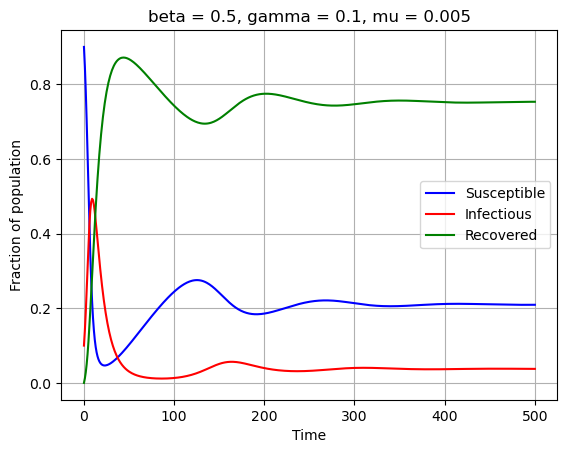

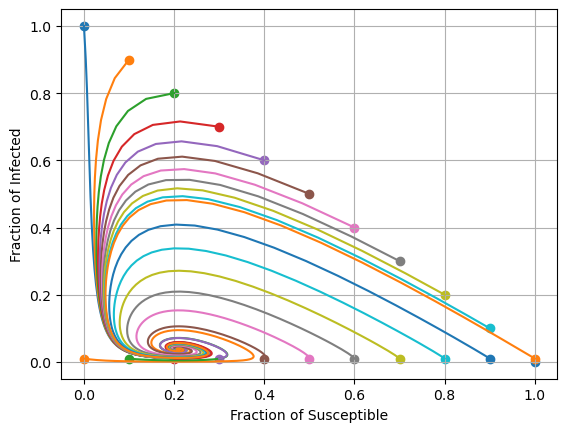

In [174]:
# (Re)define the initial conditions, parameters and time interval
q0 = (0.9, 0.1, 0.0)
parameters = (0.5, 0.1, 0.005, 0.0) # beta = 0.5, gamma = 0.1, mu = 0.005
t = np.linspace(0, 500, 500) # 500 time units (days)

# Solve the SIR model
S, I, R = solve_sir_model(q0, t, parameters)

plot_sir_model(S, I, R, t, "beta = 0.5, gamma = 0.1, mu = 0.005")

phase_space_sir_model(t, parameters, '')

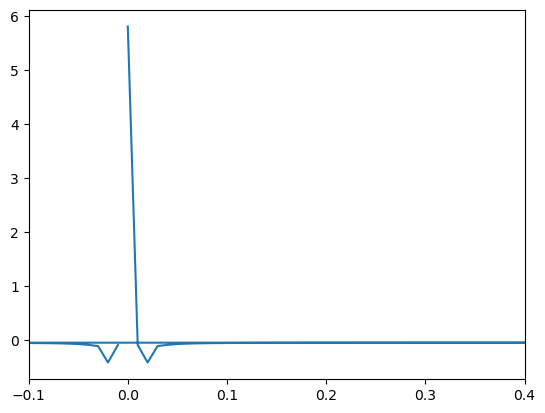

In [187]:
fourier = fftpack.fft(I)

freqs = fftpack.fftfreq(len(I))

plt.plot(freqs, fourier.real)
plt.xlim(-0.1, 0.4)

plt.show()

# PROBLEM 2.2

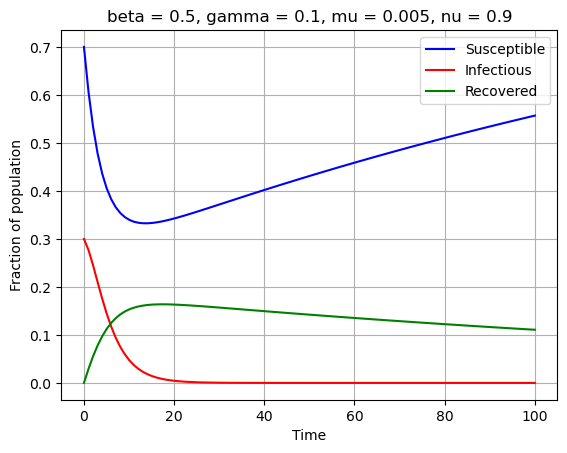

In [188]:
# (Re)define the initial conditions, parameters and time interval
q0 = (0.7, 0.3, 0.0) # S(0) = 0.7, I(0) = 0.3, R(0) = 0.0
parameters = (0.5, 0.1, 0.005, 0.3) # beta = 0.5, gamma = 0.1, mu = 0.005, nu = 0.3
t = np.linspace(0, 100, 100) # 100 time units (days)

# Solve the SIR model
S, I, R = solve_sir_model(q0, t, parameters)

plot_sir_model(S, I, R, t, "beta = 0.5, gamma = 0.1, mu = 0.005, nu = 0.9")

# PROBLEM 3.1

In [192]:
def seir_model(q, t, beta, gamma, sigma, mu):
    """Return the SEIR model equations"""
    
    S, E, I, R = q
    
    dSdt = mu - beta*S*I - mu*S
    dEdt = beta*S*I - mu*E - sigma*E
    dIdt = sigma*E - gamma*I - mu*I
    dRdt = gamma*I - mu*R
    
    dqdt = [dSdt, dEdt, dIdt, dRdt]
    
    return dqdt

In [193]:
def solve_seir_model(q0, t, parameters):
    """Solve the SIR model with numerical integration."""

    sol = odeint(seir_model, q0, t, parameters)
    S, E, I, R = sol[:, 0], sol[:, 1], sol[:, 2], sol[:, 3]

    return S, E, I, R

In [196]:
def phase_space_seir_model(t, parameters, title):
    """Plot phase space diagram of model."""

    initial_conditions = []
    for i in np.linspace(0.0,1.0,11):
        S0 = i
        E0 = 0.0
        I0 = 1.0 - i
        R0 = 0.0
        initial_conditions.append((S0, E0, I0, R0))
    for j in np.linspace(0.0,1.0,11):
        S0 = j
        E0 = 0.0
        I0 = 0.01
        R0 = 1-j-0.01
        initial_conditions.append((S0, E0, I0, R0))
        
    for condition in initial_conditions:
        S0, E0, I0, R0 = condition
        q0 = [S0, E0, I0, R0]
        S, E, I,R = solve_seir_model(q0, t, parameters)
        plt.scatter(S0, I0, marker='o')
        plt.plot(S, I)

    plt.title(title)
    plt.xlabel('Fraction of Susceptible')
    plt.ylabel('Fraction of Infected')
    plt.grid()
    plt.show()

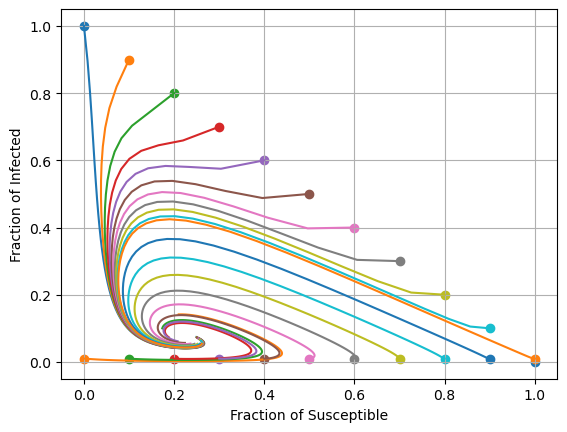

In [203]:
# Define parameters and time interval
parameters = (0.5, 0.1, 1, 0.01) # beta = 0.5, gamma = 0.1, sigma = 0.1, mu = 0.01
t = np.linspace(0, 100, 100)

phase_space_seir_model(t, parameters, '')

# PROBLEM 3.2

In [204]:
def beta(t, beta0, beta1, omega):
    """Return sinusoidal beta."""
    return beta0 * (1 + beta1 * np.sin(omega * t))

def seasonal_sir_model(q, t, beta0, beta1, gamma, mu, omega):
    """Return the SIR equations with sinusoidal beta."""
    S, I, R = q

    dSdt = mu - beta(t, beta0, beta1, omega) * S * I - mu * S
    dIdt = beta(t, beta0, beta1, omega) * S * I - gamma * I - mu * I
    dRdt = gamma * I - mu * R

    dqdt = [dSdt, dIdt, dRdt]

    return dqdt

In [205]:
def solve_seasonal_sir_model(q0, t, parameters):
    """Solve the SIR model with numerical integration."""

    sol = odeint(seasonal_sir_model, q0, t, parameters)
    S, I, R = sol[:, 0], sol[:, 1], sol[:, 2]

    return S, I, R

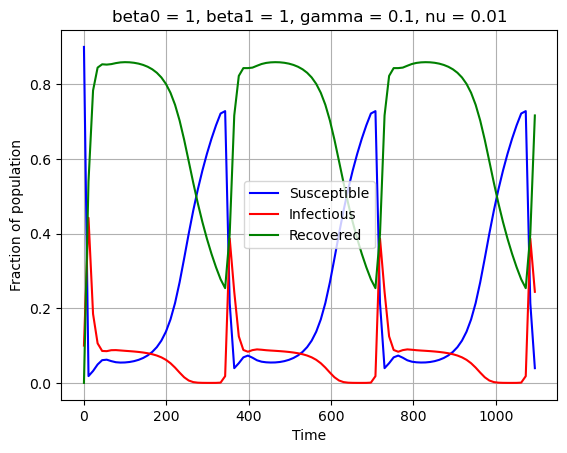

In [216]:
# Define the initial conditions, parameters and time interval
q0 = (0.9, 0.1, 0.0)
parameters = (1, 1, 0.1, 0.01, 2*np.pi/365) # 
t = np.linspace(0, 365*3, 100) # 365*3 time units (3 years)

# Solve the SIR model
S, I, R = solve_seasonal_sir_model(q0, t, parameters)

plot_sir_model(S, I, R, t, "beta0 = 1, beta1 = 1, gamma = 0.1, nu = 0.01")